### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [59]:
data = pd.read_csv('data/coupons.csv')

In [60]:
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [62]:
data.isnull().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [63]:
# The car column only has a few datas avaliable. I deceide to drop it entirely.
data = data.drop('car',axis = 1)

In [64]:
# I the number of rest of missing data is small compared to the entire data. I decide to drop them enitrely.
data = data.dropna()

In [65]:
# There is no missing data now
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [66]:
data['Y'].value_counts(normalize=True)

1    0.569335
0    0.430665
Name: Y, dtype: float64

Text(0.5, 1.0, 'Number of people who accept and otherwise')

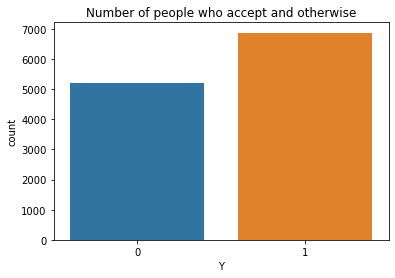

In [67]:
sns.countplot(x = 'Y',data = data)
plt.title('Number of people who accept and otherwise')

<AxesSubplot:ylabel='Accept Rate'>

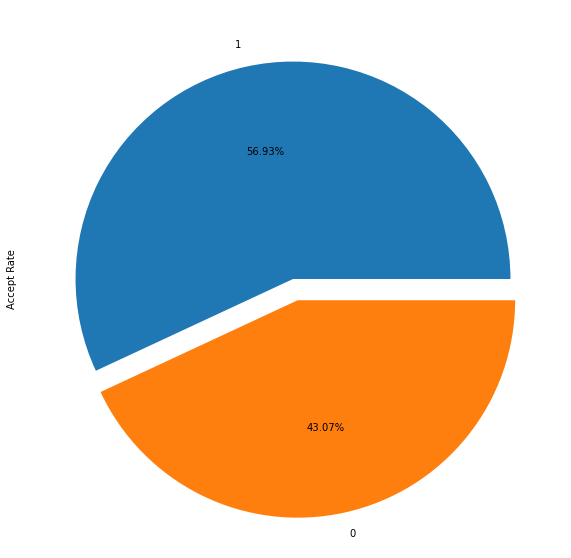

In [68]:
explode = [0, 0.1]
data['Y'].value_counts().plot.pie(autopct = '%1.2f%%',label = 'Accept Rate',explode = explode,figsize = (10,10))


5. Use a bar plot to visualize the `coupon` column.

In [69]:
data['coupon'].value_counts()


Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64

<AxesSubplot:xlabel='coupon', ylabel='count'>

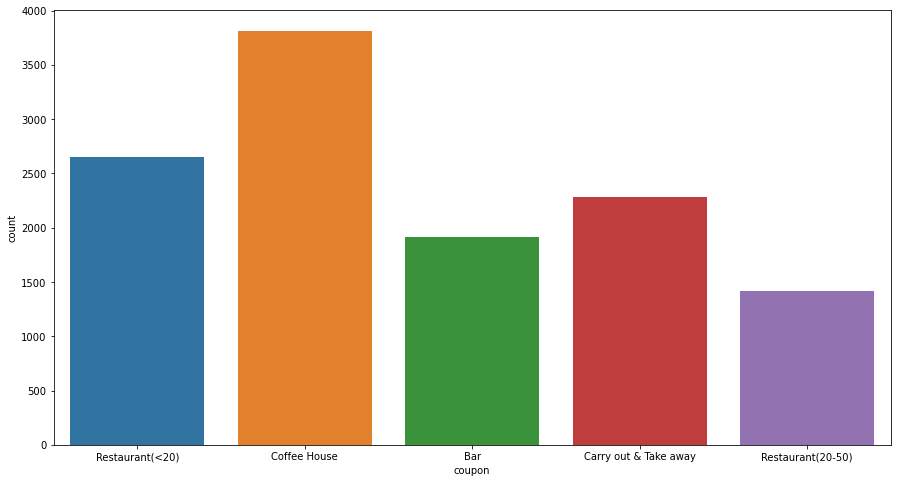

In [70]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'coupon', data = data)


6. Use a histogram to visualize the temperature column.

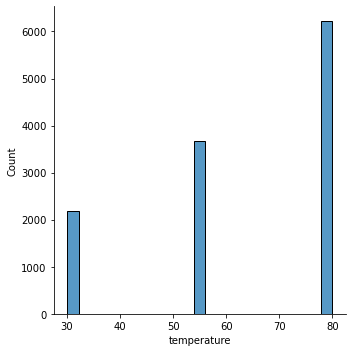

In [71]:
sns.displot(data['temperature'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='temperature', ylabel='count'>

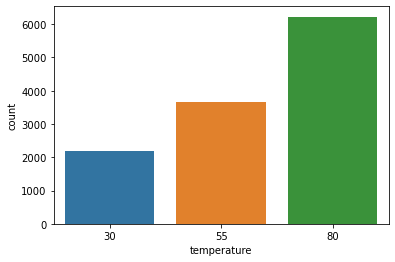

In [72]:
sns.countplot(data['temperature'])

<AxesSubplot:ylabel='temperature'>

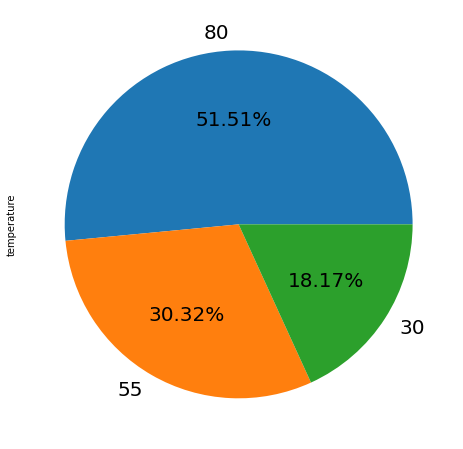

In [73]:
explode = [0, 0, 0]
data['temperature'].value_counts().plot.pie(autopct = '%1.2f%%',figsize = (8,8),explode = explode,fontsize = 20)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [74]:
data['index'] = data.index
bar_data = data.query('coupon == "Bar" ')

In [75]:
bar_data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,index
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1,24
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1,35
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,1,0,1,1,39
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,0,1,0,46
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,0,Some college - no degree,Student,$12500 - $24999,never,4~8,1~3,1~3,never,1,0,0,1,0,0,57


2. What proportion of bar coupons were accepted?


In [76]:
proportion = bar_data['Y'].value_counts(normalize=True)
print('My answer:')
print(f'{round(proportion[1]*100,2)} percet of bar coupons were accepted')

My answer:
41.19 percet of bar coupons were accepted


<AxesSubplot:ylabel='Accept rate of bar coupon'>

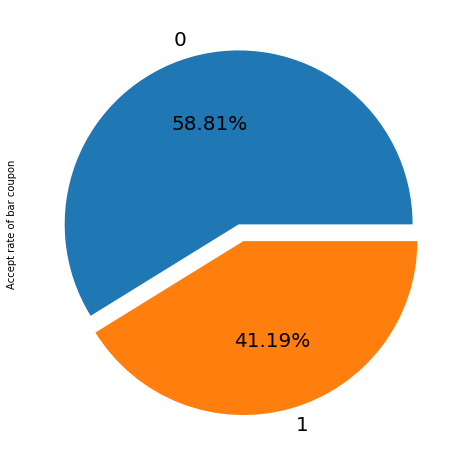

In [77]:
explode = [0,0.1]
bar_data['Y'].value_counts().plot.pie(autopct = '%0.2f%%',explode = explode,figsize = (8,8),label = 'Accept rate of bar coupon',fontsize = 20)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [78]:
bar_data['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

My answer
Acceptance rate of those who went to a bar 3 or fewer times a month:0.373
Acceptance rate of those who went to a bar more than times a month:0.762


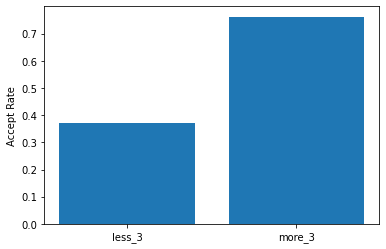

In [79]:
less_3 = ['never','less1','1~3']
more_3 = ['gt8','4~8']

less = bar_data.query('Bar in @less_3')['Y'].mean()
more = bar_data.query('Bar in @more_3')['Y'].mean()

x = ['less_3','more_3']
height = [less,more]
plt.bar(x,height)
plt.ylabel('Accept Rate')
print('My answer')
print(f'Acceptance rate of those who went to a bar 3 or fewer times a month:{round(less,3)}')
print(f'Acceptance rate of those who went to a bar more than times a month:{round(more,3)}')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


My answer:
Accept rate of drivers who go to a bar more than once a month and are over the age of 25:0.6898
other: 0.3377
The difference is 0.3521


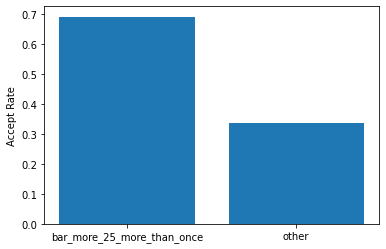

In [80]:
more_25 = [ '46', '26', '31', '41', '50plus', '36']
less_25 = ['21','below21']
less_1 = ['never','less1']
more_1 = ['1~3', 'gt8', '4~8']

more = bar_data.query('Bar in @more_1 & age in @more_25')['Y'].mean()
more_index = bar_data.query('Bar in @more_1 & age in @more_25')['index'].values
less = bar_data.query('index not in @more_index')['Y'].mean()
plt.bar(x = ['bar_more_25_more_than_once','other'],height= [more,less])
plt.ylabel('Accept Rate')
print('My answer:')
print(f'Accept rate of drivers who go to a bar more than once a month and are over the age of 25:{round(more,4)}')
print(f'other: {round(less,4)}')
print(f'The difference is {round(more - less,4)}')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [81]:
bar_farm = bar_data.query('Bar in @more_1 & age != "below21" & occupation != "Farming Fishing & Forestry"')
bar_farm_index = bar_farm['index']

other = bar_data.query('index not in @bar_farm_index')


My answer:
Accept rate of more_1_not_kid_other than farming, fishing, or forestry:0.6904
other: 0.2961
The difference is 0.3943


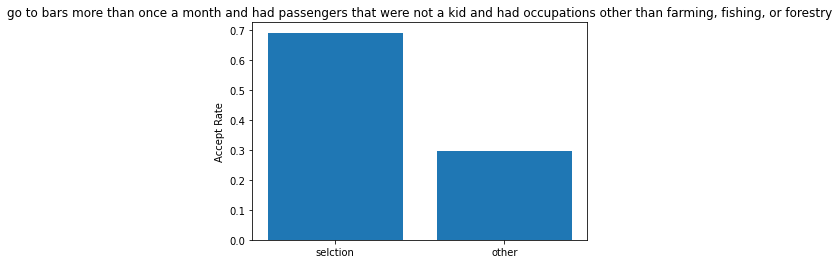

In [82]:
result = [bar_farm['Y'].mean(),other['Y'].mean()]
plt.bar(x = ['selction','other'],height= result)
plt.title('go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry')
plt.ylabel('Accept Rate')
print('My answer:')
print(f'Accept rate of more_1_not_kid_other than farming, fishing, or forestry:{round(result[0],4)}')
print(f'other: {round(result[1],4)}')
print(f'The difference is {round(result[0] - result[1],4)}')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



### go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*

My answer:
The accept rate for those go to bars more than once a month, had passengers that were not a kid, and were not widowed is 0.6904
The accept rate for all the other is 0.2961


Text(0, 0.5, 'Accept Rate')

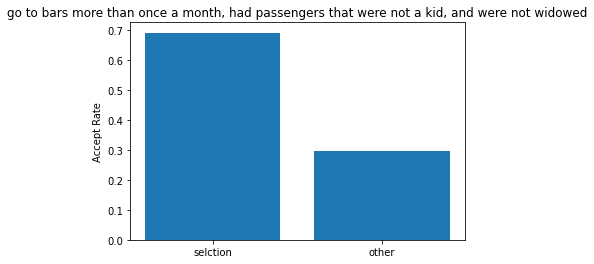

In [83]:
bar_6_1 = bar_data.query('Bar in @more_1 & age != "below21" & maritalStatus != "Widowed "')
index_6_1 = bar_6_1['index'].values
other = bar_data.query('index not in @index_6_1')

s_1 = bar_6_1['Y'].mean()
s_2 = other['Y'].mean()
print('My answer:')
print(f'The accept rate for those go to bars more than once a month, had passengers that were not a kid, and were not widowed is {round(s_1,4)}')
print(f'The accept rate for all the other is {round(s_2,4)}')
plt.bar(x = ['selction','other'],height= [s_1,s_2])
plt.title('go to bars more than once a month, had passengers that were not a kid, and were not widowed')
plt.ylabel('Accept Rate')


#### go to bars more than once a month and are under the age of 30 *OR*


My answer:
The accept rate for those go to bars more than once a month and are under the age of 30 is 0.7195
The accept rate for all the other is 0.3483


Text(0, 0.5, 'Accept Rate')

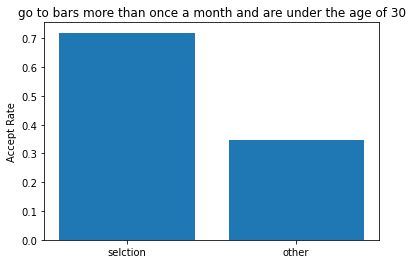

In [84]:
below_30 = ['21','26','below21']
below = bar_data.query('Bar in @more_1 & age in @below_30')
below_index = below['index'].values
other = bar_data.query('index not in @below_index')

s_1 = below['Y'].mean()
s_2 = other['Y'].mean()
print('My answer:')
print(f'The accept rate for those go to bars more than once a month and are under the age of 30 is {round(s_1,4)}')
print(f'The accept rate for all the other is {round(s_2,4)}')
plt.bar(x = ['selction','other'],height= [s_1,s_2])
plt.title('go to bars more than once a month and are under the age of 30')
plt.ylabel('Accept Rate')


**go to cheap restaurants more than 4 times a month and income is less than 50K.**

In [85]:
data['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [86]:
data['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [87]:
more_4 = ['4~8', 'gt8']
less_50 = [ '$12500 - $24999', 
      '$37500 - $49999', '$25000 - $37499',
        'Less than $12500']

My answer:
The accept rate for those go to cheap restaurants more than 4 times a month and income is less than 50K is 0.6025
The accept rate for all the other is 0.4025


Text(0, 0.5, 'Accept Rate')

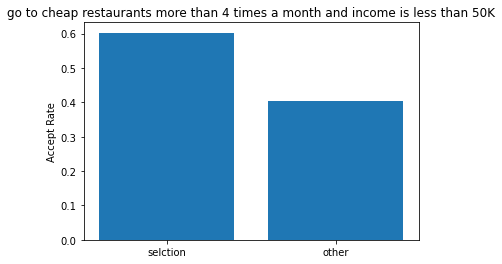

In [88]:
data_more4_less50 = data.query('RestaurantLessThan20 in @more_4 & income in @less_50')
data_more4_less50_index = data_more4_less50['index'].values
other = bar_data.query('index not in @data_more4_less50_index')

s_1 = data_more4_less50['Y'].mean()
s_2 = other['Y'].mean()
print('My answer:')
print(f'The accept rate for those go to cheap restaurants more than 4 times a month and income is less than 50K is {round(s_1,4)}')
print(f'The accept rate for all the other is {round(s_2,4)}')
plt.bar(x = ['selction','other'],height= [s_1,s_2])
plt.title('go to cheap restaurants more than 4 times a month and income is less than 50K')
plt.ylabel('Accept Rate')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The accept rate for those go to cheap restaurants more than 4 times a month and income is less than 50K is 0.6025
<br />The accept rate for all the other is 0.4025

<br />The accept rate for those go to bars more than once a month, had passengers that were not a kid, and were not widowed is 0.6903
<br />The accept rate for all the other is 0.2960

<br />The accept rate for those go to bars more than once a month and are under the age of 30 is 
0.7195
<br />The accept rate for all the other is 0.3482


<br />Acceptance rate of those who went to a bar 3 or fewer times a month:0.373
<br />Acceptance rate of those who went to a bar more than times a month:0.762


<br />Accept rate of drivers who go to a bar more than once a month and are over the age of 25:0.6898
<br />other: 0.3377


<br />Accept rate of go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. :0.6904
<br />other: 0.2961



<br />  Base on the above results (choose the conditons with high accept rate), I assume those who went to a bar more than times a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry and were not widowed and are under the age of 30 are more likely to accept the bar coupon. I test the accept rate for those people. The accept rate is 0.8095, which is higher than any groups in the previous questions.







In [89]:
# Test this assumption
age = ['21','26']
as_data = bar_data.query('Bar in @more_1 & age in @age & Bar in @more_3 & occupation != "Farming Fishing & Forestry" & maritalStatus != "Widowed"')
as_data['Y'].mean()

0.8095238095238095

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [90]:
data['coupon'].value_counts()

Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64

## I choose to analyze the Coffe House Group

In [91]:
pd.set_option('display.max_columns', None)
coffee = data.query('coupon == "Coffee House"')
coffee.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,index
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0,23
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0,26
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0,27
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0,28
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0,30


In [92]:
# check the accept rate of coffee house coupon
coffee['Y'].mean()

0.49633123689727465

In [108]:
#Examine the relationship between accept rate and number of times to the coffee house
coffee['CoffeeHouse'].value_counts()

less1    1052
1~3      1019
never     896
4~8       507
gt8       342
Name: CoffeeHouse, dtype: int64

Text(6.799999999999997, 0.5, 'accept rate')

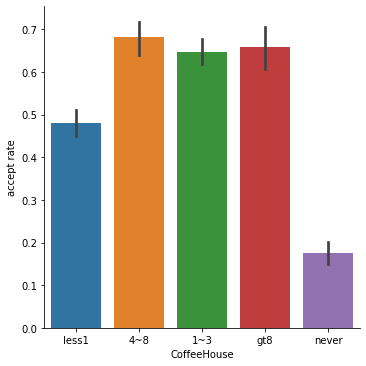

In [111]:
sns.catplot(x = 'CoffeeHouse',y = 'Y',data = coffee,kind = 'bar')
plt.ylabel('accept rate')

In [113]:
# filter the data for people who go the coffee more than once a month
coffee_ = coffee.query('CoffeeHouse in @more_1')

### From the above bar plot, those who go the coffee house more than once a month are more like to accept the coupon

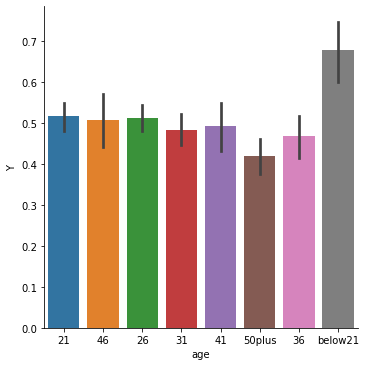

In [93]:
# Examine the relationship between accept rate and age

sns.catplot(x = 'age', y = 'Y', data = coffee,kind = 'bar')

In [94]:
# To simplify the data, i will replace the below 21 as 18, and 50plus as 60
coffee = coffee.copy()
coffee['age'] =coffee['age'].replace('below21','18')
coffee['age'] =coffee['age'].replace('50plus','60')
coffee['age'] = coffee['age'].astype(float)

<AxesSubplot:xlabel='age', ylabel='count'>

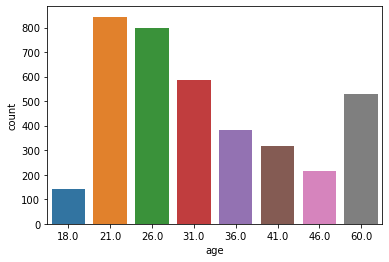

In [95]:
sns.countplot(x = 'age',data = coffee)

Text(6.799999999999997, 0.5, 'Accept rate')

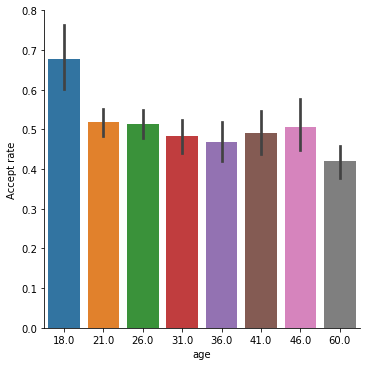

In [96]:
sns.catplot(x = 'age', y = 'Y', data = coffee,kind = 'bar')
plt.ylabel('Accept rate')

In [97]:
coffee.groupby(coffee['age']< 30)['Y'].mean()

age
False    0.468012
True     0.528587
Name: Y, dtype: float64

### From the age distribution bar graph, those who are under age of 30 account for the most of poeple in the coffee house group. From the accept rate graph, those who are under age of 30 also have high accept rate compare to other group. Let's add one more condtion: go to the coffee house more than once a month

Text(6.799999999999997, 0.5, 'Accept rate')

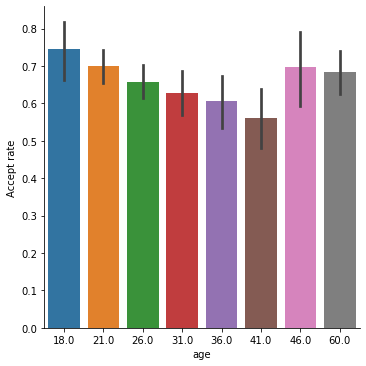

In [114]:
sns.catplot(x = 'age', y = 'Y', data = coffee_,kind = 'bar')
plt.ylabel('Accept rate')

### In this case, the accept rate decrease from below 21 to 41, and increase from 41 to 50plus. So young people and older people are more likely to accept the coupon

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '$62500 - $74999'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$75000 - $87499'),
  Text(3, 0, '$50000 - $62499'),
  Text(4, 0, '$37500 - $49999'),
  Text(5, 0, '$25000 - $37499'),
  Text(6, 0, '$100000 or More'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

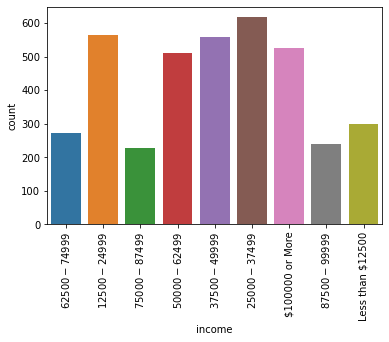

In [98]:
# Examine the relationship between accept rate and age
sns.countplot(x = 'income', data = coffee)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '$62500 - $74999'),
  Text(1, 0, '$12500 - $24999'),
  Text(2, 0, '$75000 - $87499'),
  Text(3, 0, '$50000 - $62499'),
  Text(4, 0, '$37500 - $49999'),
  Text(5, 0, '$25000 - $37499'),
  Text(6, 0, '$100000 or More'),
  Text(7, 0, '$87500 - $99999'),
  Text(8, 0, 'Less than $12500')])

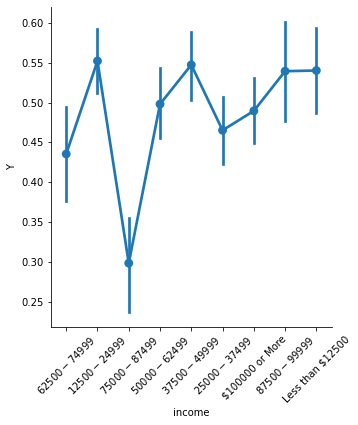

In [99]:
sns.catplot(x ='income', y = 'Y', data = coffee,kind = 'point')
plt.xticks(rotation = 45)

In [115]:
coffee.groupby('income')['Y'].mean().sort_values(ascending=False)

income
$12500 - $24999     0.552212
$37500 - $49999     0.547406
Less than $12500    0.540268
$87500 - $99999     0.539419
$50000 - $62499     0.498047
$100000 or More     0.489524
$25000 - $37499     0.465154
$62500 - $74999     0.435424
$75000 - $87499     0.298246
Name: Y, dtype: float64

The accept rate which is obove 0.5 those have in come 

<br />$12500 - $24999     0.552212
<br />$37500 - $49999     0.547406
<br />Less than $12500    0.540268
<br />$87500 - $99999     0.539419

<br />The accept rate which is below 0.5 those have in come 

<br />$50000 - $62499     0.498047
<br />$100000 or More     0.489524
<br />$25000 - $37499     0.465154
<br />$62500 - $74999     0.435424
<br />$75000 - $87499     0.298246

<br /> In general, those who have income less than 50000 are more likely to accept the coupon while those who have income more than 50000 are less like to accept the coupon.This meke sense since people make more money do not care the coupon very much. However, there are two execeptions which are 

<br />$87500 - $99999     0.539419
<br />$25000 - $37499     0.465154

This is wiered. Let's add one more condtion: go to the coffee house more than once a month. Those who seld go to the coffee house might disrupt the data.


In [116]:
coffee_.groupby('income')['Y'].mean().sort_values(ascending=False)

income
$37500 - $49999     0.720472
Less than $12500    0.701220
$12500 - $24999     0.689420
$87500 - $99999     0.680556
$25000 - $37499     0.675768
$100000 or More     0.620155
$50000 - $62499     0.600000
$62500 - $74999     0.595745
$75000 - $87499     0.575758
Name: Y, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '$37500 - $49999'),
  Text(1, 0, 'Less than $12500'),
  Text(2, 0, '$12500 - $24999'),
  Text(3, 0, '$87500 - $99999'),
  Text(4, 0, '$25000 - $37499'),
  Text(5, 0, '$100000 or More'),
  Text(6, 0, '$50000 - $62499'),
  Text(7, 0, '$62500 - $74999'),
  Text(8, 0, '$75000 - $87499')])

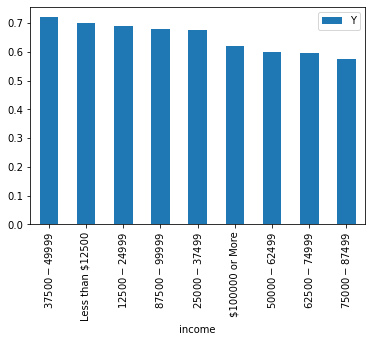

In [125]:
coffee_.groupby('income')[['Y']].mean().sort_values(by ='Y',ascending=False).plot(kind = 'bar')
plt.xticks(rotation = 90)

### In this case, those who have income less 500000 have accept rate more than 0.5

In [105]:
# Examine the relationship between accept rate and occupation
px.bar(coffee,'occupation')

#### From the people above most people's jobs are student,computer & Math, and unemployed

In [130]:
coffee.groupby('occupation')['Y'].mean().sort_values(ascending = False)

occupation
Healthcare Practitioners & Technical         0.760563
Building & Grounds Cleaning & Maintenance    0.727273
Transportation & Material Moving             0.618421
Healthcare Support                           0.615385
Student                                      0.614737
Installation Maintenance & Repair            0.568182
Architecture & Engineering                   0.555556
Farming Fishing & Forestry                   0.545455
Unemployed                                   0.537205
Computer & Mathematical                      0.501155
Arts Design Entertainment Sports & Media     0.500000
Construction & Extraction                    0.478261
Personal Care & Service                      0.476190
Life Physical Social Science                 0.475410
Business & Financial                         0.471831
Management                                   0.453875
Production Occupations                       0.450000
Protective Service                           0.448276
Office & Administ

Text(0, 0.5, 'accept rate')

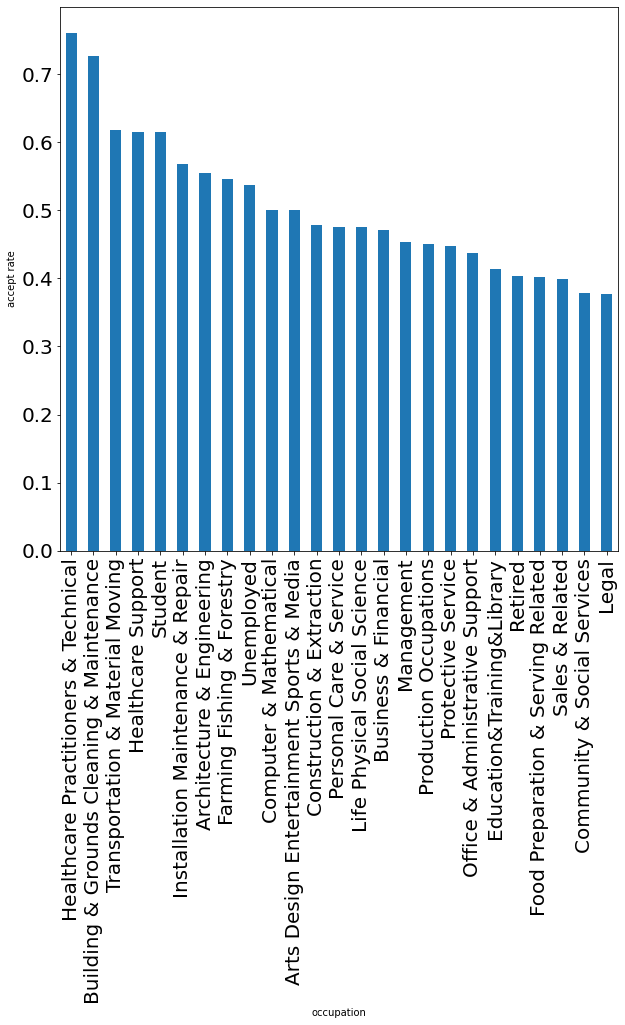

In [138]:
coffee.groupby('occupation')['Y'].mean().sort_values(ascending = False).plot(kind = 'bar',figsize=(10,10),fontsize=20)
plt.ylabel('accept rate')

Healthcare Practitioners & Technical         0.760563
<br />Building & Grounds Cleaning & Maintenance    0.727273
<br />Transportation & Material Moving             0.618421
<br />Healthcare Support                           0.615385
<br />Student                                      0.614737
<br /> These five occupation have accpet rate more than 0.6

In [135]:
coffee_.groupby('occupation')['Y'].mean().sort_values(ascending = False)

occupation
Healthcare Practitioners & Technical        0.900000
Personal Care & Service                     0.888889
Construction & Extraction                   0.875000
Production Occupations                      0.857143
Installation Maintenance & Repair           0.807692
Transportation & Material Moving            0.777778
Food Preparation & Serving Related          0.740741
Unemployed                                  0.728346
Arts Design Entertainment Sports & Media    0.712766
Protective Service                          0.700000
Student                                     0.675585
Computer & Mathematical                     0.658654
Architecture & Engineering                  0.650000
Retired                                     0.641509
Business & Financial                        0.620690
Healthcare Support                          0.613636
Legal                                       0.612903
Office & Administrative Support             0.604396
Management                         

Text(0.5, 1.0, 'Go to coffee house more than once a month')

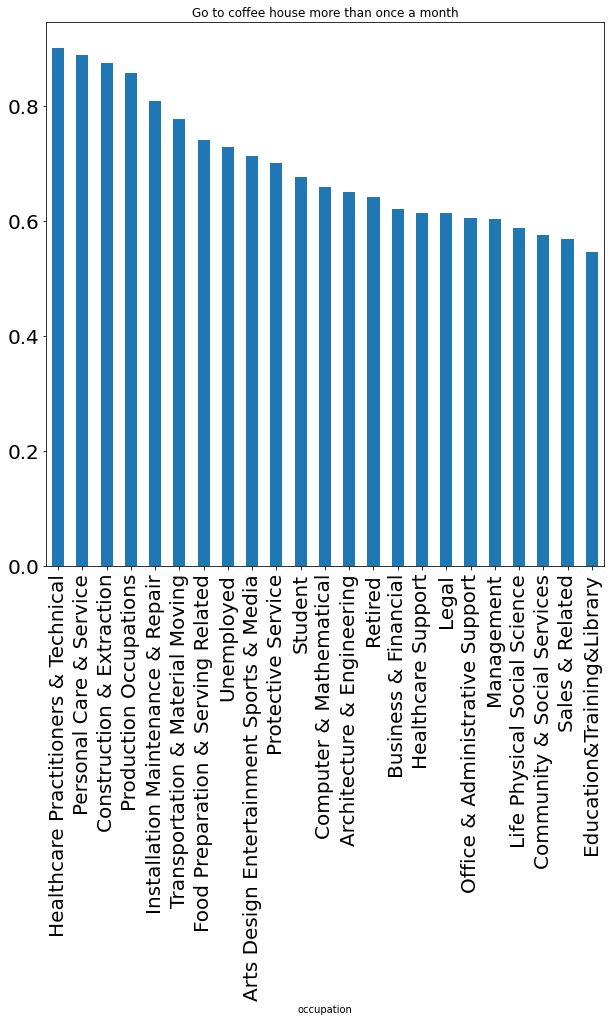

In [139]:
coffee_.groupby('occupation')['Y'].mean().sort_values(ascending = False).plot(kind = 'bar',figsize=(10,10),fontsize=20)
plt.title('Go to coffee house more than once a month')

### overall accept rate increase for all jobs for those people go coffee house more than once a month.only these four jobs have accept rate below 0.6
Life Physical Social Science               
Community & Social Services                 
Sales & Related                             
Education&Training&Library 
### These jobs have really high accept rate
<br />Healthcare Practitioners & Technical        0.900000
<br />Personal Care & Service                     0.888889
<br />Construction & Extraction                   0.875000
<br />Production Occupations                      0.857143
<br />Installation Maintenance & Repair           0.807692                 

#### Base on the above observation, I will assume people who go to the coffee house more than once a month, under age of 25 or over age of 45, have income less than 50000. The accept rate group is 0.72. The number of people in this group is account for 45.6 percent of people who go to the coffee shop more than once a month. The accept rate is not very high. I can increase the accept rate if narrow more such as selecting by occupations and choose those occupations with high accept rate. However, this will not apply to the most of people in the group who go to the coffee shop more than month,since jobs with high accept rate have less people.

In [172]:
#test
less_50000 = ['$12500 - $24999','$25000 - $37499','$37500 - $49999',
      'Less than $12500']
      
coffee_.query('age < 25 or age > 35 and income in @less_50000')['Y'].mean()

0.7206572769953051

In [173]:
coffee_.query('age < 25 or age > 35 and income in @less_50000').shape[0]/coffee_.shape[0]

0.45610278372591007